IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      78.0  0.000016   0.007035   -0.256313   0.083775          0.0   
1      80.0 -0.038437   0.010156    1.780233   0.107748        104.0   
2      21.0 -0.002851   0.011491    2.725695   0.107088         55.0   
3      61.0 -0.048604   0.006262   -0.085867   0.092785          0.0   
4      14.0 -0.113252   0.039963   -0.458789   0.229519         51.0   
...     ...       ...        ...         ...        ...          ...   
1344    1.0 -0.042134   0.019788   -0.909437   0.146654         81.0   
1345    7.0  0.009608   0.007576   -0.459746   0.087447         70.0   
1346    5.0 -0.108029   0.039805   -0.426276   0.226634         46.0   
1347   28.0 -0.027652   0.019892   -0.118197   0.143543        112.0   
1348   21.0 -0.024581   0.019605   -0.074402   0.141974         81.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0           113.0    5.667477    2.795418  0.013376  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0     0.000016   0.007035   -0.256313   0.083775          0.0        113.0   
1    -0.038437   0.010156    1.780233   0.107748        104.0         79.0   
2    -0.002851   0.011491    2.725695   0.107088         55.0         70.0   
3    -0.048604   0.006262   -0.085867   0.092785          0.0        112.0   
4    -0.113252   0.039963   -0.458789   0.229519         51.0         71.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.042134   0.019788   -0.909437   0.146654         81.0         60.0   
1345  0.009608   0.007576   -0.459746   0.087447         70.0         89.0   
1346 -0.108029   0.039805   -0.426276   0.226634         46.0         63.0   
1347 -0.027652   0.019892   -0.118197   0.143543        112.0         84.0   
1348 -0.024581   0.019605   -0.074402   0.141974         81.0        107.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.065055   0.011499    0.495681    0.12531          0.0         83.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340   12.380287    5.291856  0.013966   0.006377  ...      10686.384444   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340          3.60101          1.175954          -0.542521          3.760363   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               104.0               105.0          17.890724   

     amp2(Curr(ESC_5))  Guasto  
340          17.717868       0  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0     0.000016   0.007035   -0.256313   0.083775          0.0        113.0   
1    -0.038437   0.010156    1.780233   0.107748        104.0         79.0   
2    -0.002851   0.011491    2.725695   0.107088         55.0         70.0   
3    -0.048604   0.006262   -0.085867   0.092785          0.0        112.0   
4    -0.113252   0.039963   -0.458789   0.229519         51.0         71.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.042134   0.019788   -0.909437   0.146654         81.0         60.0   
1345  0.009608   0.007576   -0.459746   0.087447         70.0         89.0   
1346 -0.108029   0.039805   -0.426276   0.226634         46.0         63.0   
1347 -0.027652   0.019892   -0.118197   0.143543        112.0         84.0   
1348 -0.024581   0.019605   -0.074402   0.141974         81.0        107.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0     0.000016   0.007035   -0.256313   0.083775     0.000000   113.000000   
1    -0.038437   0.010156    1.780233   0.107748   104.000000    79.000000   
2    -0.002851   0.011491    2.725695   0.107088    55.000000    70.000000   
3    -0.048604   0.006262   -0.085867   0.092785     0.000000   112.000000   
4    -0.113252   0.039963   -0.458789   0.229519    51.000000    71.000000   
...        ...        ...         ...        ...          ...          ...   
1618 -0.033001   0.010037    1.980831   0.105366    69.000000    93.000000   
1619 -0.029311   0.009995    2.107868   0.104060    61.217864    80.435727   
1620 -0.004621   0.007294   -0.238351   0.085435     0.000000   101.628872   
1621 -0.127591   0.041525   -1.537119   0.240188    59.618934    77.618934   
1622 -0.039735   0.010041    1.804586   0.107689    92.776461    70.621169   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=40)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=40, score_func=<function f_regression at 0x000002124F67D120>)
[ True  True False False  True False False False  True  True False  True
  True False  True  True False  True  True  True False False  True False
 False False False False  True False  True False  True False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True
 False False  True False False False False False False False False False
 False False False False  True  True  True False  True  True False  True
 False False False False False False False False  True  True False False
 False  True False False False False False False  True False False  True
 False False False False False  True False False False False False False
 False False False False False  True False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

         Input_Features   F_Score
34           kurt(AccY)  5.362593
28          freq1(AccX)  3.544546
12          freq1(GyrY)  3.150425
11            RMS(GyrY)  2.754265
153    kurt(RPM(ESC_5))  2.659826
9             var(GyrY)  2.648999
93    freq2(RPM(ESC_1))  2.564015
92    freq1(RPM(ESC_1))  2.553611
14           amp1(GyrY)  2.445492
159    var(Curr(ESC_5))  2.240791
152     var(RPM(ESC_5))  1.894745
8              <>(GyrY)  1.878785
104      <>(RPM(ESC_2))  1.861796
78     amp1(RPM(ESC_0))  1.751904
22           amp1(GyrZ)  1.565551
107     RMS(RPM(ESC_2))  1.555968
32             <>(AccY)  1.555342
62          amp1(Pitch)  1.194742
30           amp1(AccX)  1.104868
76    freq1(RPM(ESC_0))  1.076241
17            var(GyrZ)  1.035740
4           freq1(GyrX)  1.028136
80      <>(Curr(ESC_0))  0.970521
19            RMS(GyrZ)  0.953071
77    freq2(RPM(ESC_0))  0.946680
57           var(Pitch)  0.856226
156    amp1(RPM(ESC_5))  0.825185
81     var(Curr(ESC_0))  0.701080
97     var(Cur

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[2, 3, 5, 6, 7, 10, 13, 16, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 98, 99, 100, 101, 102, 103, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 154, 155, 157, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
0     0.000016   0.007035     0.000000  0.013376   0.005309   0.073997   
1    -0.038437   0.010156   104.000000 -0.010494   0.005827   0.076968   
2    -0.002851   0.011491    55.000000  0.065403   0.011314   0.124743   
3    -0.048604   0.006262     0.000000  0.035884   0.004043   0.072945   
4    -0.113252   0.039963    51.000000  0.047035   0.010486   0.112558   
...        ...        ...          ...       ...        ...        ...   
1618 -0.033001   0.010037    69.000000 -0.009242   0.005965   0.077690   
1619 -0.029311   0.009995    61.217864 -0.008921   0.006066   0.078294   
1620 -0.004621   0.007294     0.000000  0.011757   0.005163   0.072730   
1621 -0.127591   0.041525    59.618934  0.024037   0.009164   0.098574   
1622 -0.039735   0.010041    92.776461 -0.010569   0.005750   0.076476   

      freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  <>(RPM(ESC_2))  \
0      123.000000    3.544653    1

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
340 -0.065055   0.011499          0.0  0.013966   0.006377   0.080972   

     freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  <>(RPM(ESC_2))  \
340        117.0    5.812668    2.480478   0.004452  ...     5251.307882   

     RMS(RPM(ESC_2))  var(Curr(ESC_2))  freq2(RPM(ESC_3))  kurt(RPM(ESC_4))  \
340      5327.934487          0.638038               42.0          -0.75895   

     var(RPM(ESC_5))  kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  <>(Curr(ESC_5))  \
340     1.425616e+06         -0.992208      16525.618547          3.60101   

     var(Curr(ESC_5))  
340          1.175954  

[1 rows x 40 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
0     0.000016   0.007035     0.000000  0.013376   0.005487   -0.833642   
1    -0.038437   0.010156   104.000000 -0.010494   0.004170   -1.204324   
2    -0.002851   0.011491    55.000000  0.065403   0.004461   -1.446426   
3    -0.048604   0.006262     0.000000  0.035884   0.012584   -1.097649   
4    -0.113252   0.039963    51.000000  0.047035   0.004486   -0.961759   
...        ...        ...          ...       ...        ...         ...   
1618 -0.033001   0.010037    69.000000 -0.009242   0.004357   -1.265502   
1619 -0.029311   0.009995    61.217864 -0.008921   0.004519   -1.324627   
1620 -0.004621   0.007294     0.000000  0.011757   0.005292   -0.755860   
1621 -0.127591   0.041525    59.618934  0.024037   0.005617   -0.852162   
1622 -0.039735   0.010041    92.776461 -0.010569   0.004102   -1.186193   

      RMS(GyrZ)  amp1(GyrZ)  var(Curr(ESC_1))  <>(RPM(ESC_2))  \
0      0.154409    1.100140       

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
340 -0.065055   0.011499          0.0  0.013966   0.004452   -1.224313   

     RMS(GyrZ)  amp1(GyrZ)  var(Curr(ESC_1))  <>(RPM(ESC_2))  \
340   0.121602    2.452869          0.217773     5251.307882   

     var(Curr(ESC_2))  kurt(RPM(ESC_4))  
340          0.638038          -0.75895  


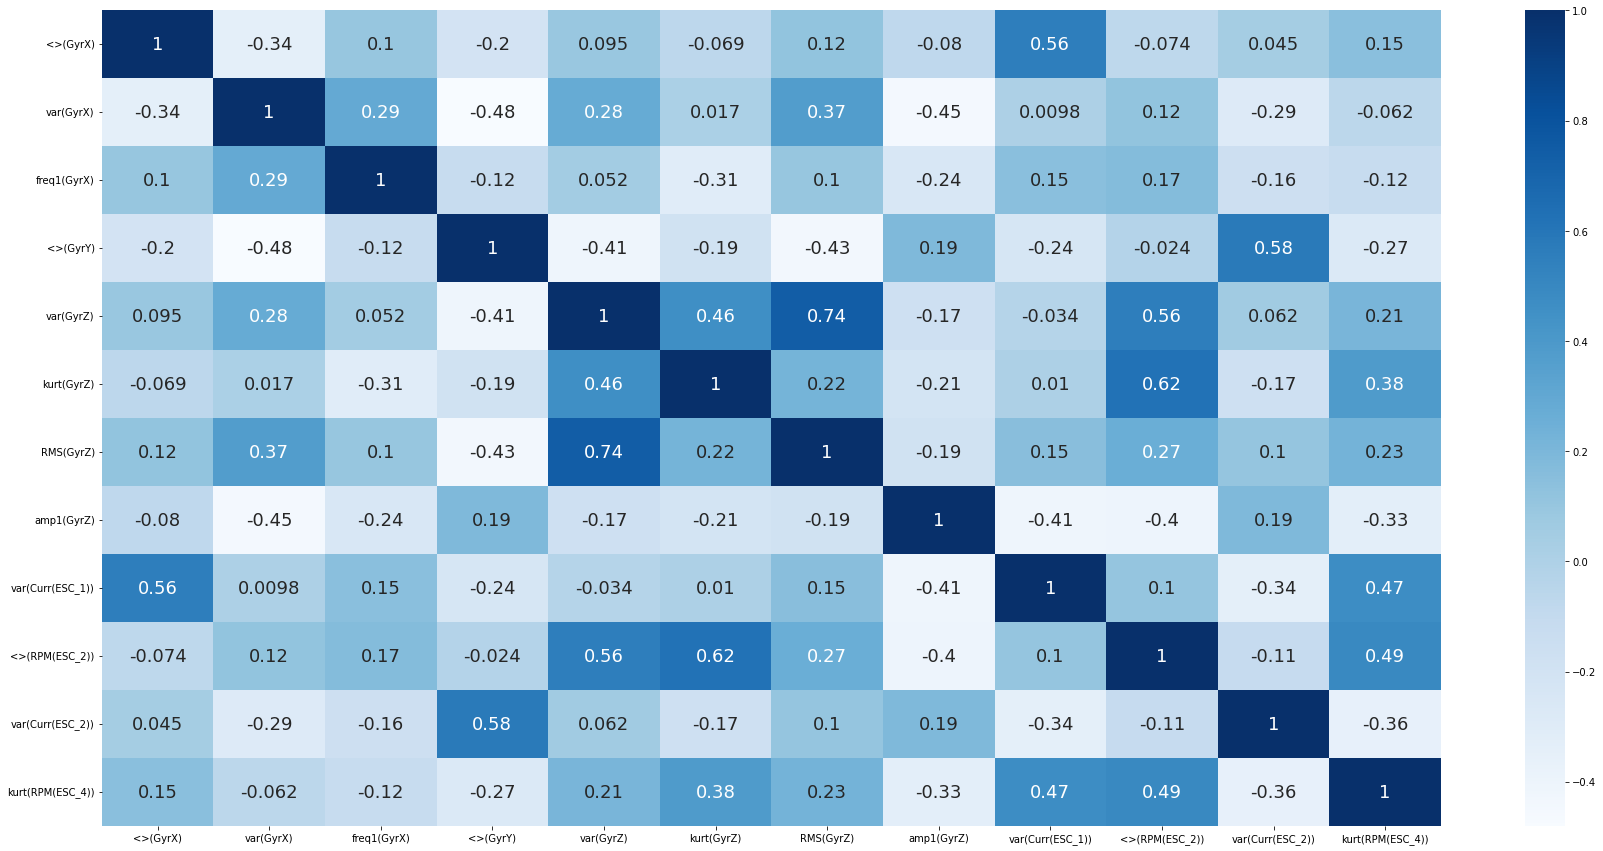

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 12)
(325, 12)
(1298, 1)
(325, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

In [23]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')

    print("----------------------------------------------------")
    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    
    i += 1

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


Cross-Validation: [0.8        0.76923077 0.81923077 0.82239382 0.81853282]
Accuracy: 0.77 	 ---> LogisticRegression 
Test: 0    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.67307692 0.61153846 0.63461538 0.66023166 0.59459459]
Accuracy: 0.66 	 ---> SVC 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.33461538 0.33461538 0.33076923 0.33590734 0.33590734]
Accuracy: 0.52 	 ---> MLPClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.56153846 0.52692308 0.53076923 0.33590734 0.54826255]
Accuracy: 0.36 	 ---> SGDClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


### Matrici di confusione

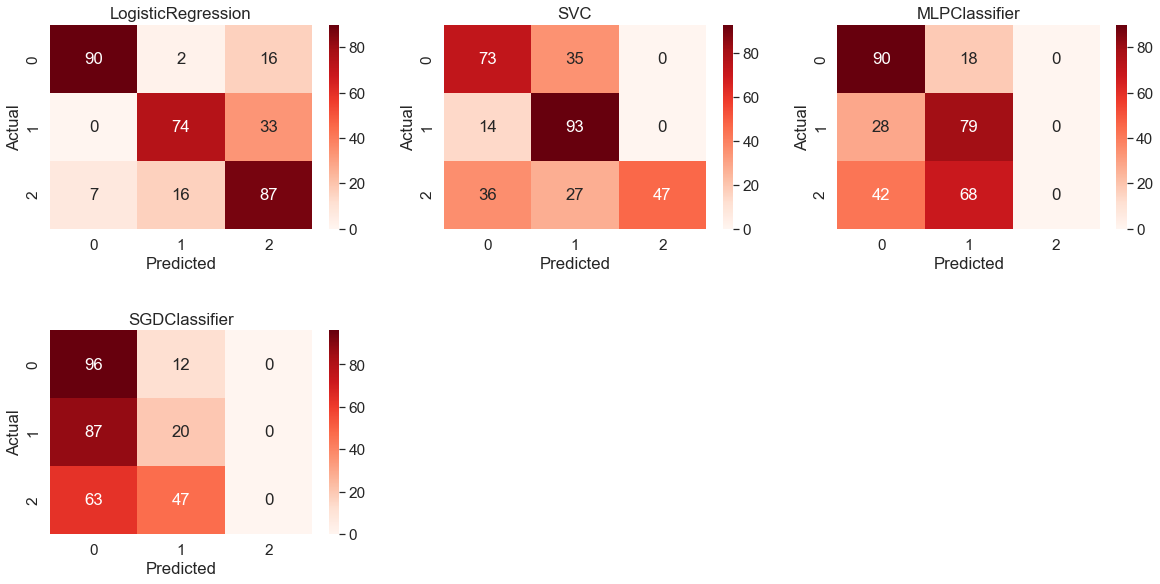

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

Text(0.5, 1.0, 'Cross validation scores')

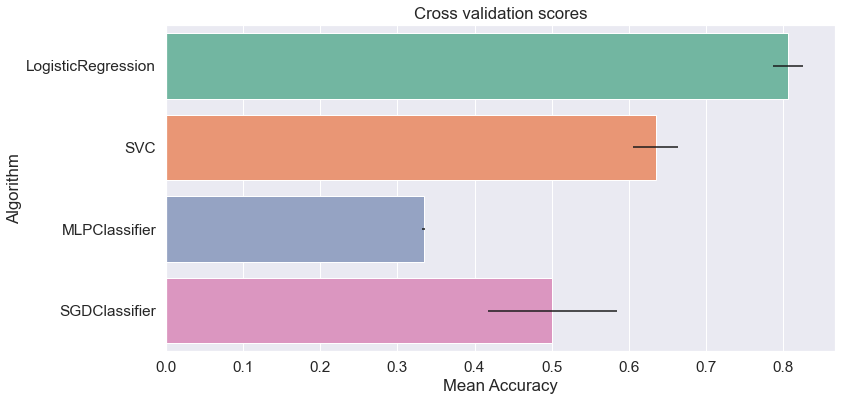

In [25]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [26]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       108
           1       0.80      0.69      0.74       107
           2       0.64      0.79      0.71       110

    accuracy                           0.77       325
   macro avg       0.79      0.77      0.78       325
weighted avg       0.79      0.77      0.78       325

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.68      0.63       108
           1       0.60      0.87      0.71       107
           2       1.00      0.43      0.60       110

    accuracy                           0.66       325
   macro avg       0.73      0.66      0.65       325
weighted avg       0.73      0.66      0.65       325

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.83      0.67       108
           1       0.48